In [1]:
import torch.distributions as dist
from scipy import stats
import matplotlib.pyplot as plt
from flows import*
import numpy as np

/home/yubaes/anaconda3/envs/DL/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x1 = np.linspace(-7.5, 7.5)
x2 = np.linspace(-7.5, 7.5)
x1_s, x2_s = np.meshgrid(x1, x2)
x_field = np.concatenate([x1_s[..., None], x2_s[..., None]], axis=-1)
x_field = torch.tensor(x_field, dtype=torch.float)

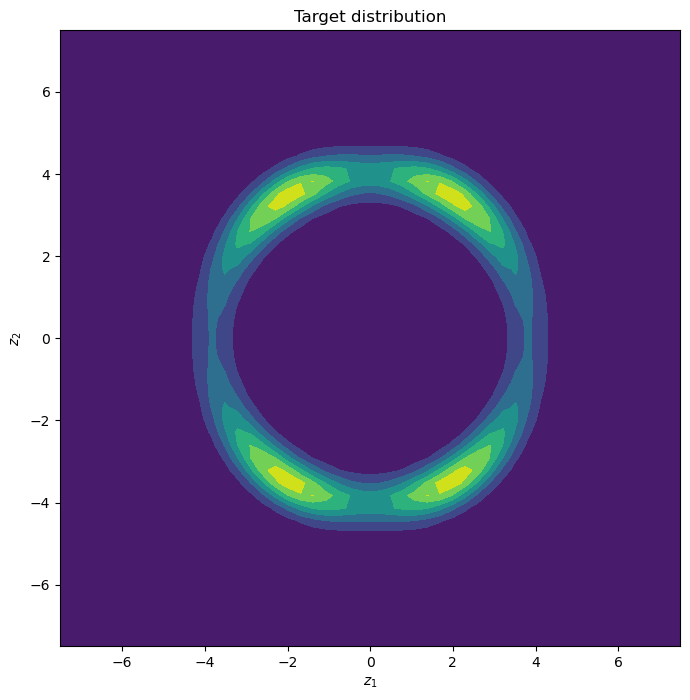

In [3]:
plt.figure(figsize=(8, 8))
plt.title("Target distribution")
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.contourf(x1_s, x2_s, target_density(x_field))
plt.show()

In [4]:
def show_samples(s0, sk, mu, title):
    
    alpha = 0.2
    
    mask_1 = (z0.data[:, 0] > mu[0]) & (z0.data[:, 1] > mu[1])
    mask_2 = (z0.data[:, 0] > mu[0]) & (z0.data[:, 1] < mu[1])
    mask_3 = (z0.data[:, 0] < mu[0]) & (z0.data[:, 1] > mu[1])
    mask_4 = (z0.data[:, 0] < mu[0]) & (z0.data[:, 1] < mu[1])
    
    for s, title in zip([s0, sk], ['Base distribution $z_0$', title]):
        plt.figure(figsize=(8, 8))
        plt.title(title)
        plt.scatter(s[:, 0][mask_1], s[:, 1][mask_1], color='C0', alpha=alpha)
        plt.scatter(s[:, 0][mask_2], s[:, 1][mask_2], color='C1', alpha=alpha)
        plt.scatter(s[:, 0][mask_3], s[:, 1][mask_3], color='C3', alpha=alpha)
        plt.scatter(s[:, 0][mask_4], s[:, 1][mask_4], color='C4', alpha=alpha)

        plt.xlim(-7.5, 7.5)
        plt.ylim(-7.5, 7.5)
        plt.show()



5.386599540710449
-1.1811007261276245
-1.2500793933868408
-1.6807948350906372
-1.6557435989379883


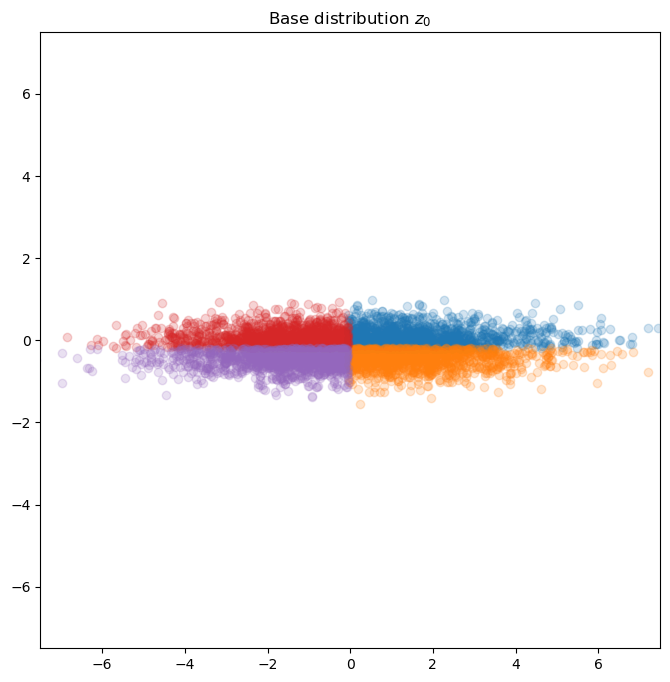

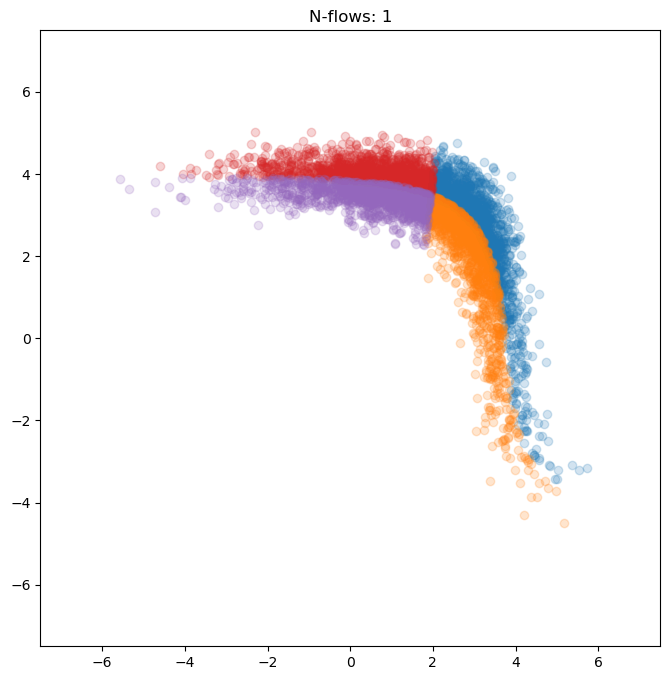

5.613903045654297
-1.9467413425445557
-2.156812906265259
-2.27927303314209
-2.379678249359131


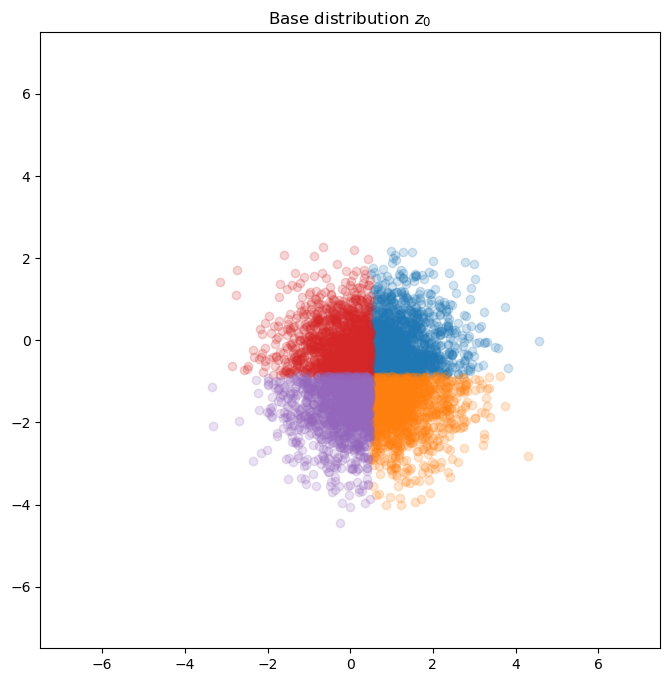

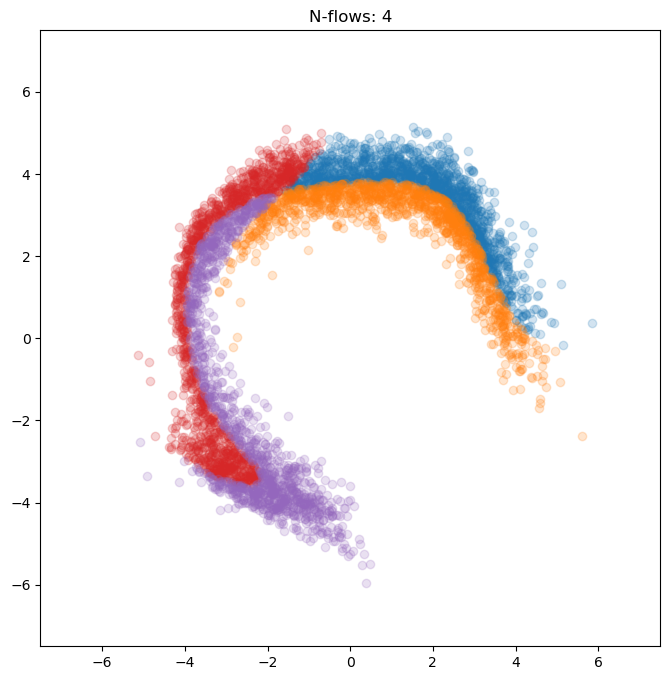

5.736354827880859
-2.1473746299743652
-2.5032129287719727
-2.577927350997925
-2.635589838027954


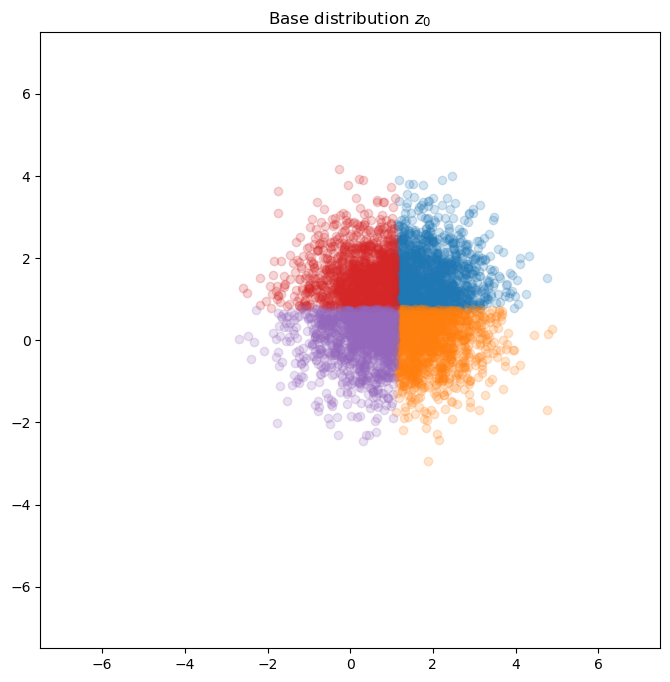

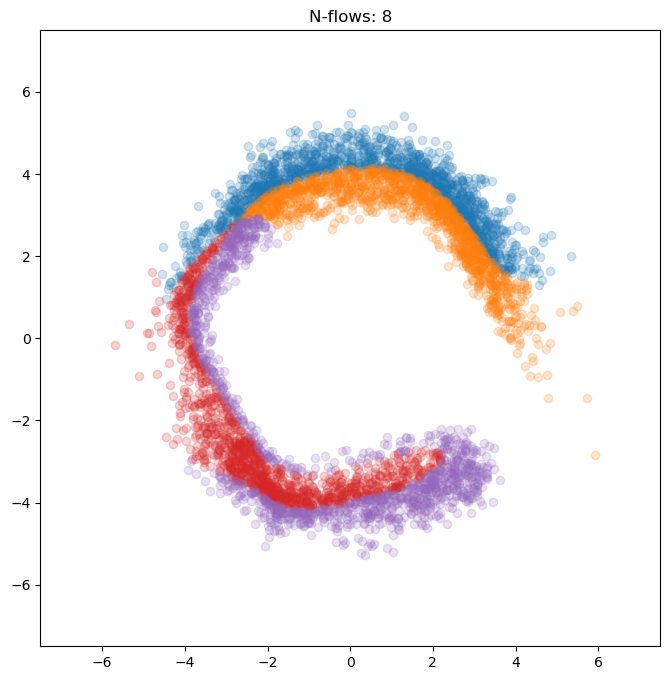

5.831238269805908
-2.2424161434173584
-2.622917890548706
-2.6966440677642822
-2.694162368774414


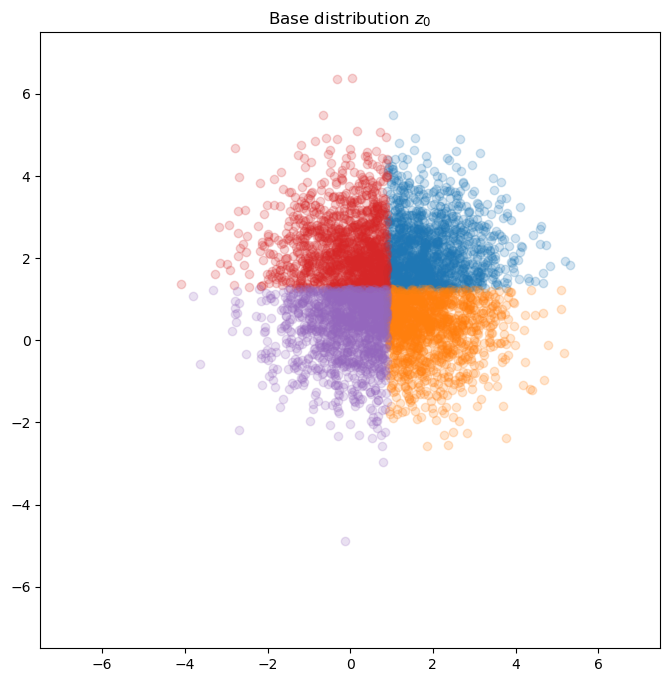

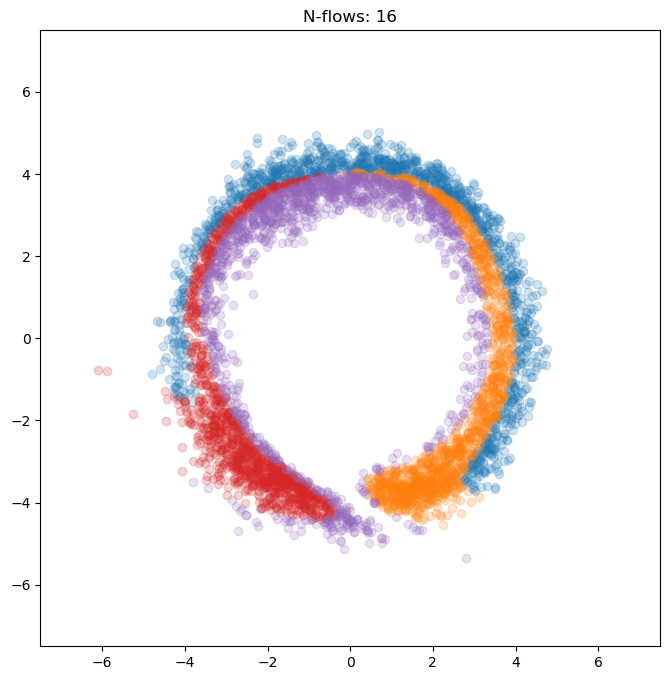

In [5]:
for n_flows in [1, 4, 8, 16]:
    flow = Flow(dim=2, n_flows=n_flows)
    shape = (1000, 2)
    train_flow(flow, shape, epochs=5000)
    z0, zk, ldj, mu, log_var = flow((5000, 2))
    show_samples(z0.data, zk.data, mu, f"N-flows: {n_flows}")